# Import Libraries

In [1]:
import numpy as np
import pickle
import pandas as pd
import scipy.stats as st
import os

# Read and Clean Data

In [12]:
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\AAM\False Rejects")
df=pd.read_pickle(os.getcwd()+"\Data Files\Transformed_NVH_DATA.pkl")
df.sort_values(by = 'PROD_TIMESTAMP', inplace = True)
df = df[df["STATIONNAME"]=="OP180B"]
df= df[(df["PROD_TIMESTAMP"]>=pd.datetime(2020,5,22))&(df["PROD_TIMESTAMP"]<=pd.datetime(2020,7,30))]
df.reset_index(drop=True, inplace = True)

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [13]:
df1= pd.read_csv(os.getcwd()+"\\Data Files\\20200813.csv")
df1.columns = ['COLLID', 'PROD_TIMESTAMP', 'TOPLEVELSERIALNUMBER','PARTNUMBER', 'STATUS', 'Pinion Slide To Full Depth Posn',
               'NVH Torque Sweep Test Cycle Count','RH Slide To Full Depth Posn','LH Slide To Full Depth Posn']

df1["PROD_TIMESTAMP"] = pd.to_datetime(df1["PROD_TIMESTAMP"],format = '%Y-%m-%d %H:%M:%S.%f')
df1["FALSE_REJECT"] = np.where((df1["STATUS"] == 'A')& (df1["NVH Torque Sweep Test Cycle Count"]>1), 1,0)

In [14]:
df2= pd.read_csv(os.getcwd()+"\\Data Files\\20200825.csv")
df2.columns = ['COLLID', 'PROD_TIMESTAMP', 'TOPLEVELSERIALNUMBER','PARTNUMBER', 'STATUS', 'Pinion Slide To Full Depth Posn',
               'NVH Torque Sweep Test Cycle Count','RH Slide To Full Depth Posn','LH Slide To Full Depth Posn', 'REJECT_CODE']
df2["PROD_TIMESTAMP"] = pd.to_datetime(df2["PROD_TIMESTAMP"],format = '%Y-%m-%d %H:%M:%S.%f')
df2["FALSE_REJECT"] = np.where((df2["STATUS"] == 'A')& (df2["NVH Torque Sweep Test Cycle Count"]>1), 1,0)

In [15]:
df=pd.concat([df,df1,df2])
df.sort_values(by = 'PROD_TIMESTAMP', inplace = True)
df.reset_index(drop=True, inplace = True)

In [49]:
df["ABNORMALITY_FLAG"]=np.where(((df.PROD_TIMESTAMP>=pd.datetime(2020,7,7,4)) & (df.PROD_TIMESTAMP<=pd.datetime(2020,7,11,20)))
                            | ((df.PROD_TIMESTAMP>=pd.datetime(2020,7,16,17)) & (df.PROD_TIMESTAMP<=pd.datetime(2020,7,18,5)))
                            | ((df.PROD_TIMESTAMP>=pd.datetime(2020,7,20,15)) & (df.PROD_TIMESTAMP<=pd.datetime(2020,7,24,1)))  
#                             | ((df.PROD_TIMESTAMP>=pd.datetime(2020,8,17,0)) & (df.PROD_TIMESTAMP<=pd.datetime(2020,8,24,23)))  
                                ,1,0)

C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df.head()

,SITENAME,LINENAME,STATIONNAME,PARTNUMBER,STATUS,TOPLEVELSERIALNUMBER,PROD_TIMESTAMP,COLLID,LH Slide To Full Depth Posn,NVH Torque Sweep Test Cycle Count,Pinion Slide To Full Depth Posn,RH Slide To Full Depth Posn,FALSE_REJECT,REJECT_CODE,ABNORMALITY_FLAG
0,GMCFULL,T1XX Front Axle FA HiV,OP180B,40217205.0,A,01A200860353,2020-05-22 06:36:39.250,-1253555860,1084.90,1.0,251.954,1114.68,0,NaN,0
1,GMCFULL,T1XX Front Axle FA HiV,OP180B,40217205.0,A,01A200860371,2020-05-22 06:37:35.920,-1253555331,1086.09,1.0,251.470,1114.56,0,NaN,0
2,GMCFULL,T1XX Front Axle FA HiV,OP180B,40217205.0,A,01A200860365,2020-05-22 06:38:31.653,-1253555324,1086.10,1.0,251.741,1114.58,0,NaN,0
3,GMCFULL,T1XX Front Axle FA HiV,OP180B,40217205.0,A,01A200860811,2020-05-22 06:40:54.227,-1253554796,1086.00,1.0,251.485,1113.95,0,NaN,0
4,GMCFULL,T1XX Front Axle FA HiV,OP180B,40217205.0,A,01A200860787,2020-05-22 06:46:42.290,-1253553687,1085.17,1.0,251.935,1114.56,0,NaN,0


# Visualize DOD trends

In [18]:
import matplotlib.pyplot as plt
df["PROD_DAY"]=df["PROD_TIMESTAMP"].apply(lambda x: pd.datetime(x.year,x.month,x.day))
df_dod = df[["PROD_DAY","FALSE_REJECT"]].groupby("PROD_DAY").agg(["sum","count"]).reset_index()
df_dod.columns = [' '.join(col).strip() for col in df_dod.columns.values]


C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


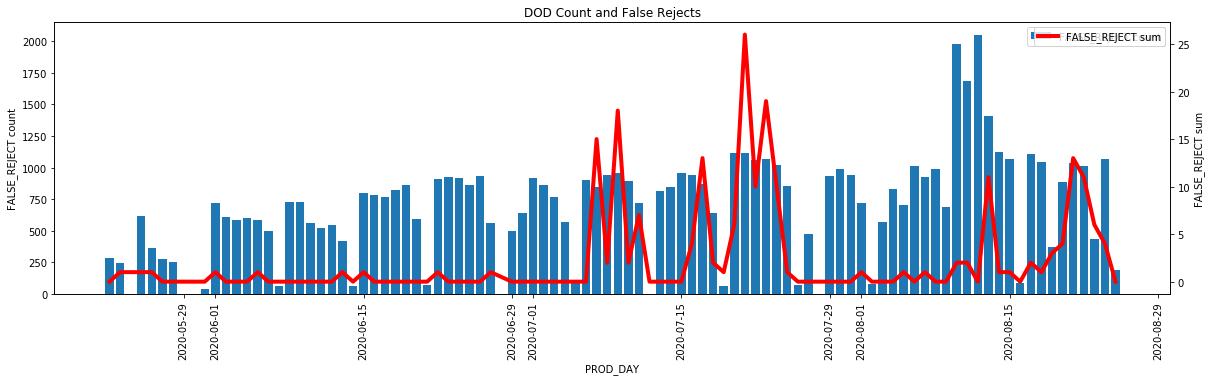

In [19]:

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,1,1)
ax1.bar(df_dod["PROD_DAY"],df_dod["FALSE_REJECT count"], label = 'FALSE_REJECT count')
plt.xlabel('PROD_DAY')
plt.ylabel('FALSE_REJECT count')
plt.legend(loc="best")
plt.xticks(rotation = 90,)
ax2 = ax1.twinx()
ax2.plot(df_dod["PROD_DAY"],df_dod["FALSE_REJECT sum"],color='red', linewidth=4, markersize=12, label = 'FALSE_REJECT sum')
plt.title("DOD Count and False Rejects")
plt.legend(loc="best")


plt.xlabel('PROD_DAY')
plt.ylabel('FALSE_REJECT sum')

plt.show()
# ax1.plot()

# df_dod.plot(x="PROD_DAY", y = ["FALSE_REJECT sum","FALSE_REJECT count"])

# Define Feature Engineering Class

In [20]:
class feature_engineer:
    def __init__(self, var_list = [],baseline_obs = 10, current_obs = 10, func='mean'):
        self.baseline_obs = baseline_obs 
        self.current_obs = current_obs
        self.threshold_feature_eng = baseline_obs+current_obs
        self.func = func
        self.var_list = var_list[:]
        
    def generate_feature(self,element):
        if len(self.var_list) >= self.threshold_feature_eng:
            self.var_list.pop(0)
        self.var_list.append(element)
        if len(self.var_list) >= self.baseline_obs + self.current_obs:
            if self.func == 'std':
                self.feature = np.std(self.var_list[-(self.current_obs):])-np.std(self.var_list[-(self.baseline_obs+self.current_obs):-(self.current_obs)])
            elif self.func == 'median':
                self.feature = np.median(self.var_list[-(self.current_obs):])-np.median(self.var_list[-(self.baseline_obs+self.current_obs):-(self.current_obs)])
            else :
                self.feature = np.mean(self.var_list[-(self.current_obs):])-np.mean(self.var_list[-(self.baseline_obs+self.current_obs):-(self.current_obs)])
        else:
            self.feature=np.nan
        return(self.feature)
        
    

# Define anamoly class (versatile to handle ewma and zscore methods)

In [87]:
class anomaly:
    def __init__(self,method = 'zscore', params = {'mean':0,'variance':0,'n_elements':0, 'p_value_warning':0.001,
                                                   'p_value_anomaly':0.0001,
                                                   'anomaly_text' : "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                                                    'warning_text' : "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by " }):
        
        self.method = method
        self.params = params 
        if method == 'zscore':
                default_params = {'mean':0,'variance':0,'n_elements':0, 'p_value_warning':0.001,
                                'p_value_anomaly':0.0001,
                                'anomaly_text' : "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                                'warning_text' : "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by "}
                default_params.update(params)
                
                self.obj = zscore(mean = default_params["mean"], variance = default_params["variance"], 
                                  n_elements = default_params["n_elements"], 
                                  p_value_warning = default_params["p_value_warning"], p_value_anomaly = default_params["p_value_anomaly"]
                                 ,anomaly_text = default_params["anomaly_text"],warning_text = default_params["warning_text"] )
                
        elif method == 'ewma':
        
                default_params = {'mean':0,'variance':0,'lambda_value':0.05, 'p_value_warning':0.001,
                                'p_value_anomaly':0.0001,
                                'anomaly_text' : "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                                'warning_text' : "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by "}
                default_params.update(params)
                
                self.obj = ewma(mean = default_params["mean"], variance = default_params["variance"], 
                                  lambda_value = default_params["lambda_value"], 
                                  p_value_warning = default_params["p_value_warning"], p_value_anomaly = default_params["p_value_anomaly"]
                                 ,anomaly_text = default_params["anomaly_text"],warning_text = default_params["warning_text"] )

                
        elif method == 'threshold':
        
                default_params = {'mean' : 0, 'n_elements':0, 'threshold_type' : 'ABSOLUTE', 'upper_thresh_anamoly' : 0.3, 'lower_thresh_anamoly' : 0.3, 
                                    'upper_thresh_warning' : 0.2, 'lower_thresh_warning' : 0.2,
                                    'anomaly_text' : "Shift: The feature crossed the threshold for anamoly flag, shift from mean = ", 
                                    'warning_text' : "Warning: The feature crossed the threshold for warning flag, shift from mean = "}
                default_params.update(params)
                
                self.obj = threshold(mean = default_params["mean"], n_elements = default_params["n_elements"], 
                                  threshold_type = default_params["threshold_type"], 
                                  upper_thresh_anamoly = default_params["upper_thresh_anamoly"], lower_thresh_anamoly = default_params["lower_thresh_anamoly"]
                                 ,upper_thresh_warning = default_params["upper_thresh_warning"], lower_thresh_warning = default_params["lower_thresh_warning"]
                                 ,anomaly_text = default_params["anomaly_text"],warning_text = default_params["warning_text"] )
        
                
        else: 
                print("Please define valid method type!")
                
    def update(self, element):
        return(self.obj.update(element))
                

# Threshold

In [104]:
class threshold:
    def __init__(self, mean = 0, n_elements=0, threshold_type = 'ABSOLUTE', upper_thresh_anamoly = 0.3, lower_thresh_anamoly = 0.3, 
                 upper_thresh_warning = 0.2, lower_thresh_warning = 0.2,
                anomaly_text = "Shift: The feature crossed the threshold for anamoly flag, shift from mean = ", 
                warning_text = "Warning: The feature crossed the threshold for warning flag, shift from mean = "):
        self.mean = mean
        self.n_elements = n_elements
        self.threshold_type = threshold_type 
        self.upper_thresh_anamoly = upper_thresh_anamoly
        self.lower_thresh_anamoly = lower_thresh_anamoly
        self.upper_thresh_warning = upper_thresh_warning
        self.lower_thresh_warning = lower_thresh_warning
        self.anomaly_text = anomaly_text
        self.warning_text = warning_text
        self.feature = 0
        
        
        
#Add cutoffs here 
    def update(self, feature):
        warning_flag = 0
        anomaly_flag = 0 
        warning_text = 'NA'
        anomaly_text = 'NA'
        self.feature = feature
        upper_limit_anamoly=0
        lower_limit_anamoly=0
        upper_limit_warning=0
        lower_limit_warning=0
        
        
        if self.threshold_type == 'PERCENTAGE':
            upper_limit_anamoly = self.upper_thresh_anamoly*self.mean
            lower_limit_anamoly = self.lower_thresh_anamoly*self.mean
            upper_limit_warning = self.upper_thresh_warning*self.mean
            lower_limit_warning = self.lower_thresh_warning*self.mean
        else:
            upper_limit_anamoly = self.upper_thresh_anamoly
            lower_limit_anamoly = self.lower_thresh_anamoly
            upper_limit_warning = self.upper_thresh_warning
            lower_limit_warning = self.lower_thresh_warning
            
        
        if pd.isna(feature) == False:
            
            if int(np.where((self.feature >= self.mean+upper_limit_anamoly) | 
                                        (self.feature <= self.mean-lower_limit_anamoly),1,0)) == 1:
                anomaly_flag = 'X'
                anomaly_text = self.anomaly_text + str(round(self.feature-self.mean,2))

            elif int(np.where((self.feature >= self.mean+upper_limit_warning) | 
                                        (self.feature <= self.mean-lower_limit_warning),1,0)) == 1:
                anomaly_flag = 'W'
                anomaly_text = self.warning_text + str(round(self.feature-self.mean,2))
                
#             self.variance = ((self.variance + self.mean ** 2) * self.n_elements + self.feature ** 2) / (self.n_elements + 1)
            self.mean = ((self.mean * self.n_elements) + self.feature) / (self.n_elements + 1)
#             self.variance = self.variance - self.mean ** 2
            self.n_elements += 1

        return (anomaly_flag, anomaly_text)

# Zscore

In [22]:
class zscore:
    def __init__(self, mean = 0, variance = 0, n_elements = 0, p_value_warning = 0.001, p_value_anomaly = 0.0001, 
                anomaly_text = "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                warning_text = "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by "):
        self.mean = mean
        self.variance = variance 
        self.n_elements = n_elements
        self.feature = 0
        self.p_value_warning = p_value_warning
        self.p_value_anomaly = p_value_anomaly
        self.anomaly_text = anomaly_text
        self.warning_text = warning_text
        
        
        
#Add cutoffs here 
    def update(self, feature):
        warning_flag = 0
        anomaly_flag = 0 
        warning_text = 'NA'
        anomaly_text = 'NA'
        self.feature = feature
        if pd.isna(feature) == False:
            z_anomaly = st.norm.ppf(1-self.p_value_anomaly)
            z_warning = st.norm.ppf(1-self.p_value_warning)
            
            if int(np.where((self.feature >= self.mean+z_anomaly*np.sqrt(self.variance)) | 
                                        (self.feature <= self.mean-z_anomaly*np.sqrt(self.variance)),1,0)) == 1:
                anomaly_flag = 'X'
                anomaly_text = str(np.where((self.feature >= self.mean+z_anomaly*np.sqrt(self.variance)) | 
                                            (self.feature <= self.mean-z_anomaly*np.sqrt(self.variance)),
                                            self.anomaly_text + str(round(self.feature-self.mean,2)) ,'NA'))

            elif int(np.where((self.feature >= self.mean+z_warning*np.sqrt(self.variance)) | 
                                        (self.feature <= self.mean-z_warning*np.sqrt(self.variance)),1,0)) == 1: 
                anomaly_flag = 'W'
                anomaly_text = str(np.where((self.feature >= self.mean+z_warning*np.sqrt(self.variance)) | 
                                            (self.feature <= self.mean-z_warning*np.sqrt(self.variance)),
                                            self.warning_text + str(round(self.feature-self.mean,2)) ,'NA'))

            self.variance = ((self.variance + self.mean ** 2) * self.n_elements + self.feature ** 2) / (self.n_elements + 1)
            self.mean = ((self.mean * self.n_elements) + self.feature) / (self.n_elements + 1)
            self.variance = self.variance - self.mean ** 2
            self.n_elements += 1

        return (anomaly_flag, anomaly_text)
        



# EWMA
#Reference: http://www.doiserbia.nb.rs/img/doi/0353-3670/2019/0353-36701902249C.pdf

In [23]:
class ewma:
    def __init__(self, mean = 0, variance = 0, n_elements = 0, lambda_value = 0.05, p_value_warning = 0.001, p_value_anomaly = 0.0001, 
                anomaly_text = "Shift: Mean of current 10 obs shifted from previous 10 obs by", 
                warning_text = "Warning: Mean of current 10 obs shifted from previous 10 obs by"):
        self.mean = mean
        self.variance = variance 
        self.lambda_value = lambda_value
        self.n_elements=n_elements
        self.feature = 0
        self.p_value_warning = p_value_warning
        self.p_value_anomaly = p_value_anomaly
        self.anomaly_text = anomaly_text
        self.warning_text = warning_text
        self.ewma_variance = variance 
        self.ewma_mean = mean
        
        
        
#Add cutoffs here 
    def update(self, feature):
        warning_flag = 0
        anomaly_flag = 0 
        warning_text = 'NA'
        anomaly_text = 'NA'
        self.feature = feature
        if pd.isna(feature) == False:
            z_anomaly = st.norm.ppf(1-self.p_value_anomaly)
            z_warning = st.norm.ppf(1-self.p_value_warning)
            
#             if int(np.where((self.feature >= self.ewma_mean+z_anomaly*np.sqrt(self.ewma_variance)) | 
#                                         (self.feature <= self.ewma_mean-z_anomaly*np.sqrt(self.ewma_variance)),1,0)) == 1:
#                 anomaly_flag = 'X'
#                 anomaly_text = str(np.where((self.feature >= self.ewma_mean+z_anomaly*np.sqrt(self.ewma_variance)) | 
#                                             (self.feature <= self.ewma_mean-z_anomaly*np.sqrt(self.ewma_variance)),
#                                             self.anomaly_text + str(round(self.feature,2)) ,'NA'))

#             elif int(np.where((self.feature >= self.ewma_mean+z_warning*np.sqrt(self.ewma_variance)) | 
#                                         (self.feature <= self.ewma_mean-z_warning*np.sqrt(self.ewma_variance)),1,0)) == 1: 
#                 anomaly_flag = 'W'
#                 anomaly_text = str(np.where((self.feature >= self.ewma_mean+z_warning*np.sqrt(self.ewma_variance)) | 
#                                             (self.feature <= self.ewma_mean-z_warning*np.sqrt(self.ewma_variance)),
#                                             selfwarning_text + str(round(self.feature,2)) ,'NA'))

            if int(np.where((self.feature >= self.ewma_mean+z_anomaly*np.sqrt(self.variance)) | 
                                        (self.feature <= self.ewma_mean-z_anomaly*np.sqrt(self.variance)),1,0)) == 1:
                anomaly_flag = 'X'
                anomaly_text = str(np.where((self.feature >= self.ewma_mean+z_anomaly*np.sqrt(self.variance)) | 
                                            (self.feature <= self.ewma_mean-z_anomaly*np.sqrt(self.variance)),
                                            self.anomaly_text + str(round(self.feature,2)) ,'NA'))

            elif int(np.where((self.feature >= self.ewma_mean+z_warning*np.sqrt(self.variance)) | 
                                        (self.feature <= self.ewma_mean-z_warning*np.sqrt(self.variance)),1,0)) == 1: 
                anomaly_flag = 'W'
                anomaly_text = str(np.where((self.feature >= self.ewma_mean+z_warning*np.sqrt(self.variance)) | 
                                            (self.feature <= self.ewma_mean-z_warning*np.sqrt(self.variance)),
                                            selfwarning_text + str(round(self.feature,2)) ,'NA'))



            self.variance = ((self.variance + self.mean ** 2) * self.n_elements + self.feature ** 2) / (self.n_elements + 1)
            self.mean = ((self.mean * self.n_elements) + self.feature) / (self.n_elements + 1)
            self.variance = self.variance - self.mean ** 2
            self.n_elements += 1

            self.ewma_mean = self.lambda_value*self.feature + (1-self.lambda_value)*self.ewma_mean
            self.ewma_variance = (self.lambda_value/(2-self.lambda_value))*self.variance
            
        return (anomaly_flag, anomaly_text)
        



# Trying EWMA on Pinion Depth Feature

In [24]:
import time
start= time.time()
feature = 'Pinion Slide To Full Depth Posn'
data_stream = df[feature]

func = anomaly(method = 'ewma', params = {'mean':0,'variance':0,'lambda_value':0.005, 'p_value_warning':0.01,
                                'p_value_anomaly':0.0001,
                                'anomaly_text' : "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                                'warning_text' : "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by "})

feature_generator = feature_engineer(var_list = [],baseline_obs = 10, current_obs = 10, func='mean')


for i in range(len(data_stream)):
# for i in range(30):
    
  
    try:
        feature = feature_generator.generate_feature(data_stream[i])
        out = func.update(feature)
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = out
#         print(feature, func.obj.mean, func.obj.variance, func.obj.ewma_mean, func.obj.ewma_variance)

    except:
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = (0,'NA')

print("Time taken: " + str(time.time()-start))
    

Time taken: 128.4495415687561


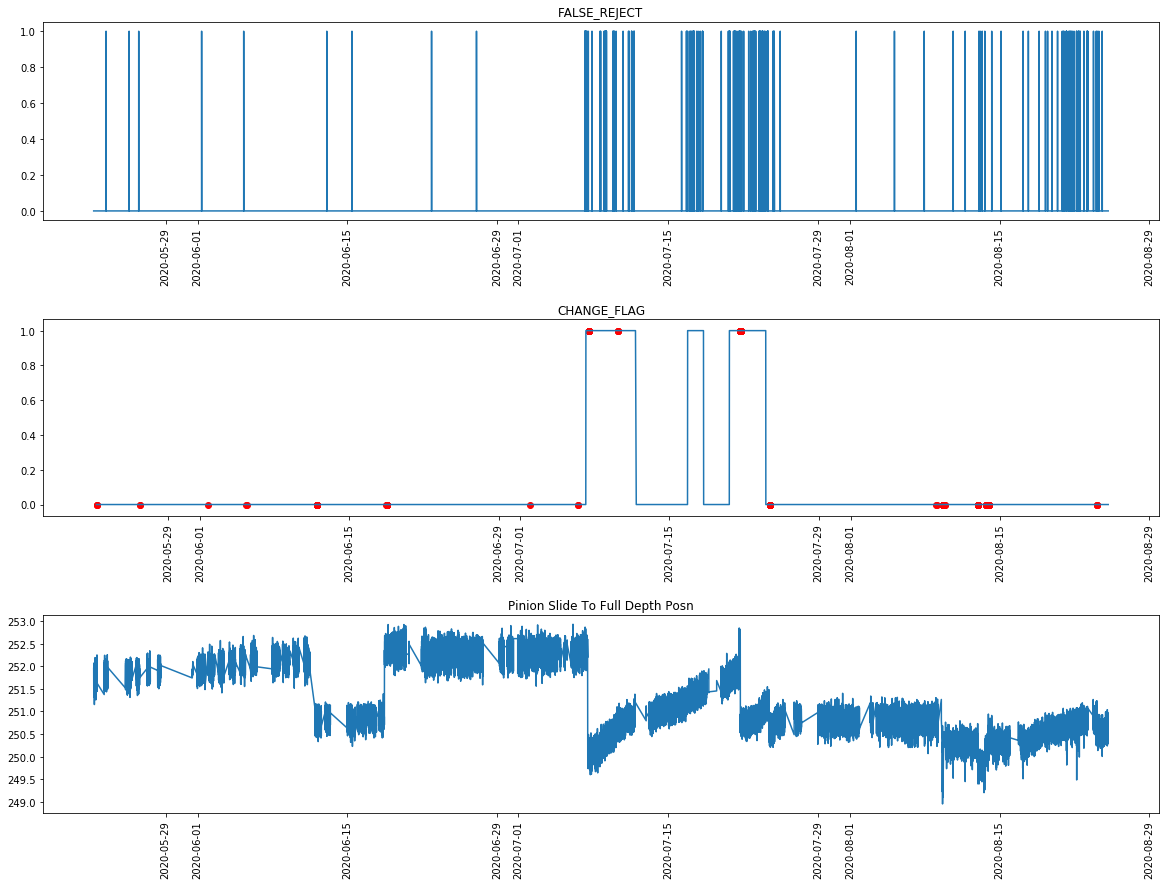

In [25]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_pd"]
features=['Pinion Slide To Full Depth Posn']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["PROD_TIMESTAMP"],df1["FALSE_REJECT"])
plt.title("FALSE_REJECT")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 'X', ['PROD_TIMESTAMP', 'ABNORMALITY_FLAG']] #anomaly
ax1.plot(df1["PROD_TIMESTAMP"],df1["ABNORMALITY_FLAG"])
ax1.scatter(a['PROD_TIMESTAMP'],a['ABNORMALITY_FLAG'], color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["PROD_TIMESTAMP"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

# Trying ZSCORE on Pinion Depth Feature

In [26]:
import time
start= time.time()
feature = 'Pinion Slide To Full Depth Posn'
data_stream = df[feature]

func = anomaly(method = 'zscore', params = {'mean':0,'variance':0,'n_elements':0, 'p_value_warning':0.01,
                                'p_value_anomaly':0.0001,
                                'anomaly_text' : "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                                'warning_text' : "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by "})

feature_generator = feature_engineer(var_list = [],baseline_obs = 10, current_obs = 10, func='mean')


for i in range(len(data_stream)):
  
    try:
        feature = feature_generator.generate_feature(data_stream[i])
        out = func.update(feature)
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = out

    except:
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = (0,'NA')

print("Time taken: " + str(time.time()-start))
    

Time taken: 134.75741147994995


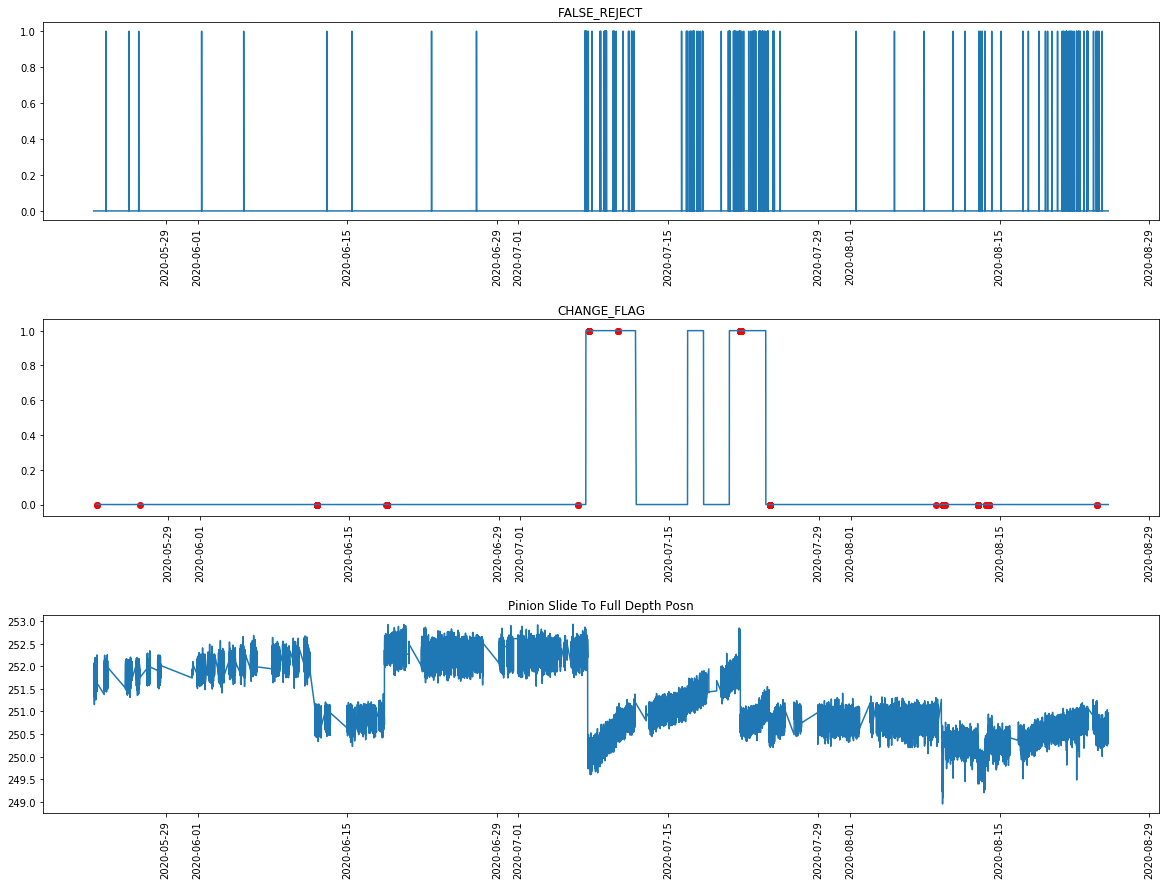

In [27]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_pd"]
features=['Pinion Slide To Full Depth Posn']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["PROD_TIMESTAMP"],df1["FALSE_REJECT"])
plt.title("FALSE_REJECT")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 'X', ['PROD_TIMESTAMP', 'ABNORMALITY_FLAG']] #anomaly
ax1.plot(df1["PROD_TIMESTAMP"],df1["ABNORMALITY_FLAG"])
ax1.scatter(a['PROD_TIMESTAMP'],a['ABNORMALITY_FLAG'], color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["PROD_TIMESTAMP"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

# Trying EWMA on LH Feature

In [35]:
import time
start= time.time()
feature = 'LH Slide To Full Depth Posn'
data_stream = df[feature]

func = anomaly(method = 'ewma', params = {'mean':0,'variance':0,'lambda_value':0.005, 'p_value_warning':0.01,
                                'p_value_anomaly':0.0001,
                                'anomaly_text' : "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                                'warning_text' : "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by "})

feature_generator = feature_engineer(var_list = [],baseline_obs = 10, current_obs = 10, func='mean')


for i in range(len(data_stream)):
# for i in range(30):
    
  
    try:
        feature = feature_generator.generate_feature(data_stream[i])
        out = func.update(feature)
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = out
#         print(feature, func.obj.mean, func.obj.variance, func.obj.ewma_mean, func.obj.ewma_variance)

    except:
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = (0,'NA')

print("Time taken: " + str(time.time()-start))
    

Time taken: 138.03632640838623


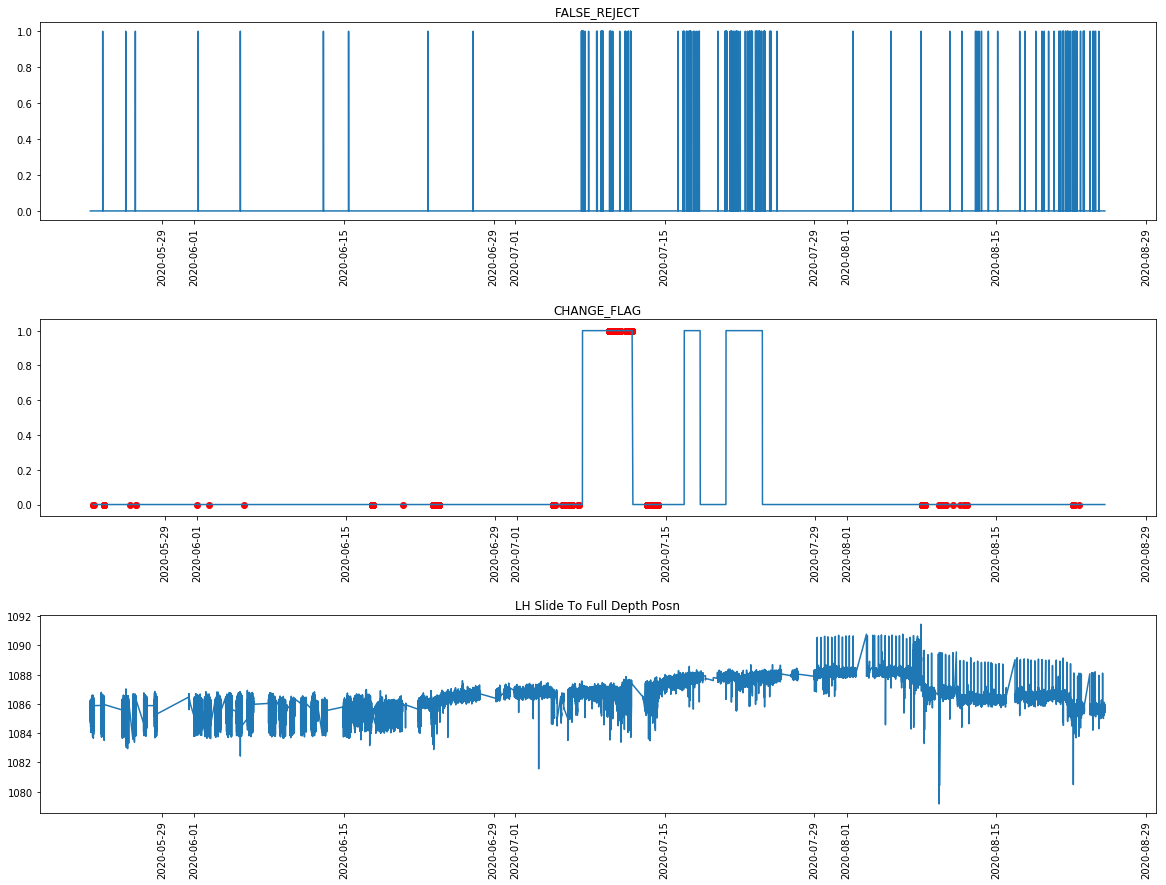

In [36]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_pd"]
features=['LH Slide To Full Depth Posn']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["PROD_TIMESTAMP"],df1["FALSE_REJECT"])
plt.title("FALSE_REJECT")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 'X', ['PROD_TIMESTAMP', 'ABNORMALITY_FLAG']] #anomaly
ax1.plot(df1["PROD_TIMESTAMP"],df1["ABNORMALITY_FLAG"])
ax1.scatter(a['PROD_TIMESTAMP'],a['ABNORMALITY_FLAG'], color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["PROD_TIMESTAMP"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

# Trying ZSCORE on Pinion LH Feature

In [29]:
import time
start= time.time()
feature = 'LH Slide To Full Depth Posn'
data_stream = df[feature]

func = anomaly(method = 'zscore', params = {'mean':0,'variance':0,'n_elements':0, 'p_value_warning':0.01,
                                'p_value_anomaly':0.0001,
                                'anomaly_text' : "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                                'warning_text' : "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by "})

feature_generator = feature_engineer(var_list = [],baseline_obs = 10, current_obs = 10, func='mean')


for i in range(len(data_stream)):
  
    try:
        feature = feature_generator.generate_feature(data_stream[i])
        out = func.update(feature)
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = out

    except:
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = (0,'NA')

print("Time taken: " + str(time.time()-start))
    

Time taken: 132.45837450027466


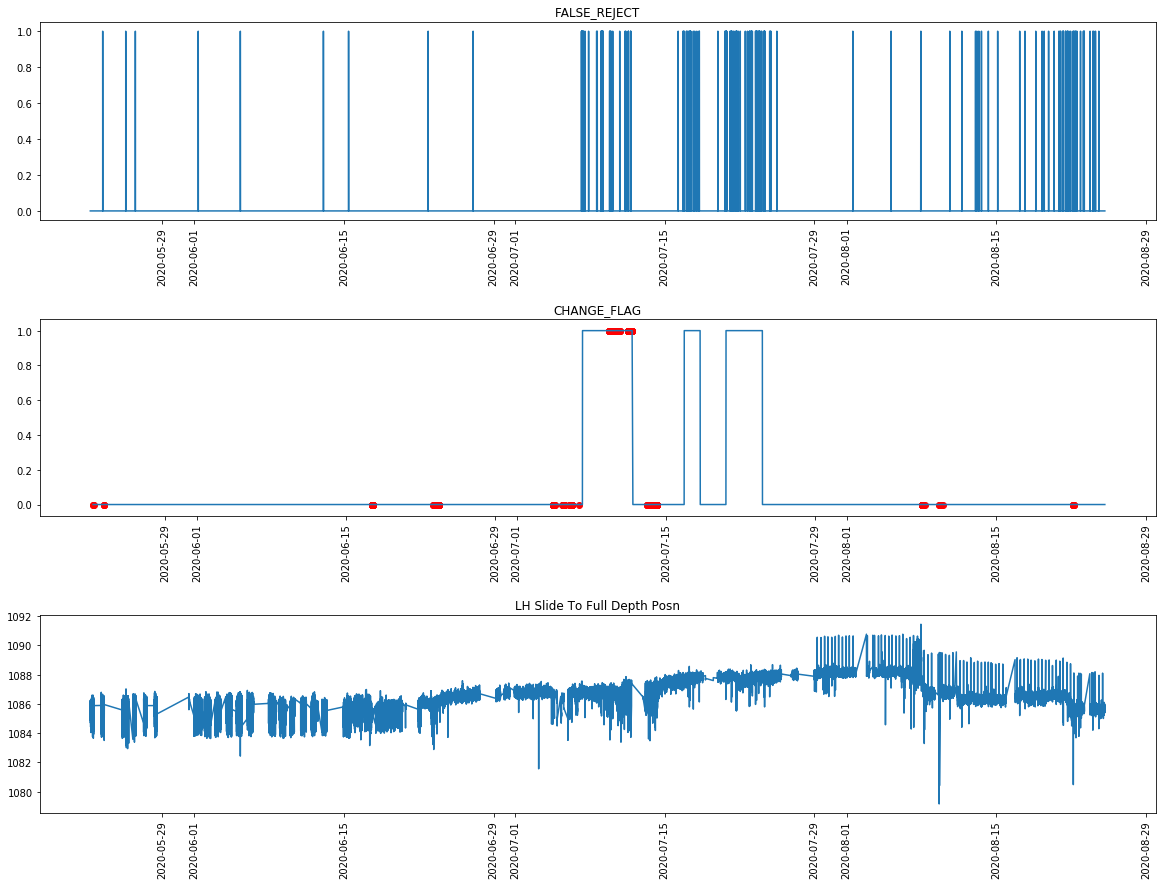

In [30]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_pd"]
features=['LH Slide To Full Depth Posn']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["PROD_TIMESTAMP"],df1["FALSE_REJECT"])
plt.title("FALSE_REJECT")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 'X', ['PROD_TIMESTAMP', 'ABNORMALITY_FLAG']] #anomaly
ax1.plot(df1["PROD_TIMESTAMP"],df1["ABNORMALITY_FLAG"])
ax1.scatter(a['PROD_TIMESTAMP'],a['ABNORMALITY_FLAG'], color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["PROD_TIMESTAMP"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

# Trying EWMA on RH Feature

In [31]:
import time
start= time.time()
feature = 'RH Slide To Full Depth Posn'
data_stream = df[feature]

func = anomaly(method = 'ewma', params = {'mean':0,'variance':0,'lambda_value':0.005, 'p_value_warning':0.01,
                                'p_value_anomaly':0.0001,
                                'anomaly_text' : "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                                'warning_text' : "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by "})

feature_generator = feature_engineer(var_list = [],baseline_obs = 10, current_obs = 10, func='mean')


for i in range(len(data_stream)):
# for i in range(30):
    
  
    try:
        feature = feature_generator.generate_feature(data_stream[i])
        out = func.update(feature)
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = out
#         print(feature, func.obj.mean, func.obj.variance, func.obj.ewma_mean, func.obj.ewma_variance)

    except:
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = (0,'NA')

print("Time taken: " + str(time.time()-start))
    

Time taken: 122.19565200805664


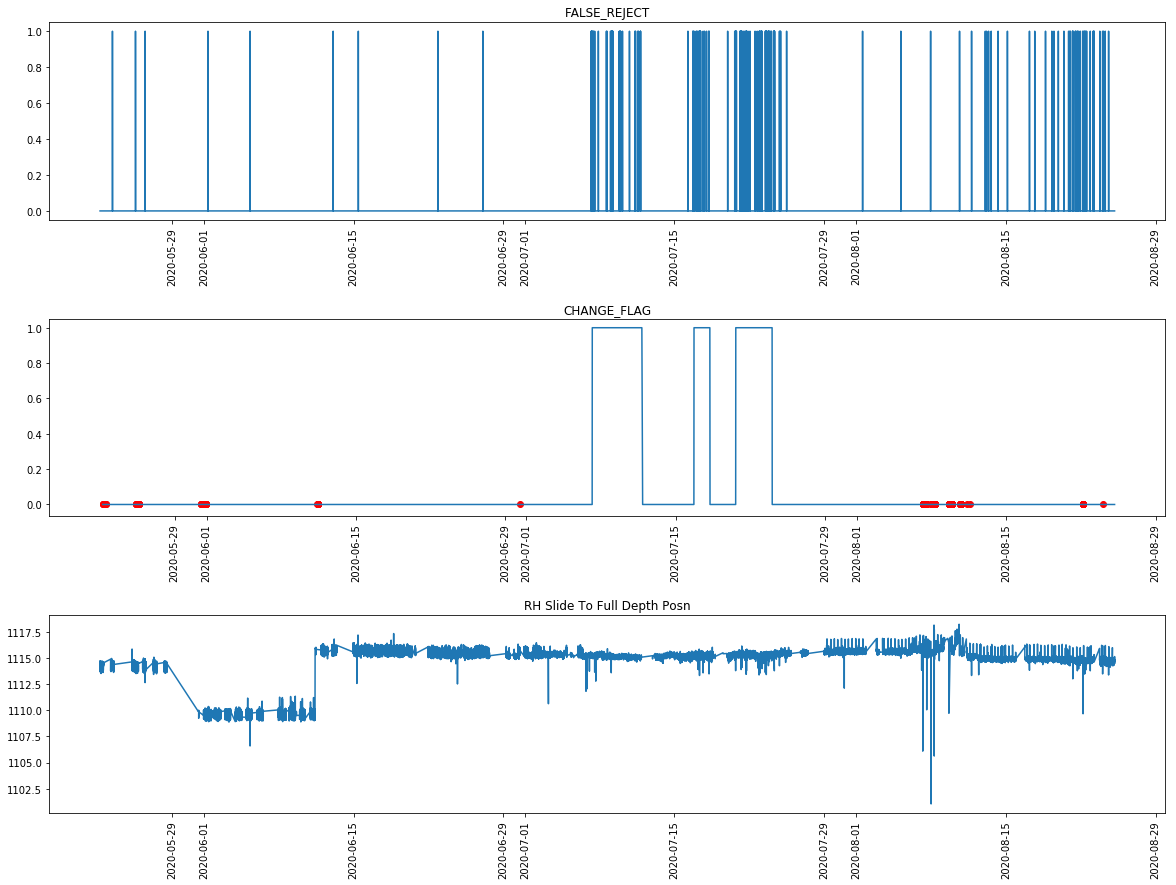

In [32]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_pd"]
features=['RH Slide To Full Depth Posn']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["PROD_TIMESTAMP"],df1["FALSE_REJECT"])
plt.title("FALSE_REJECT")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 'X', ['PROD_TIMESTAMP', 'ABNORMALITY_FLAG']] #anomaly
ax1.plot(df1["PROD_TIMESTAMP"],df1["ABNORMALITY_FLAG"])
ax1.scatter(a['PROD_TIMESTAMP'],a['ABNORMALITY_FLAG'], color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["PROD_TIMESTAMP"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

# Trying ZSCORE on Pinion RH Feature

In [33]:
import time
start= time.time()
feature = 'RH Slide To Full Depth Posn'
data_stream = df[feature]

func = anomaly(method = 'zscore', params = {'mean':0,'variance':0,'n_elements':0, 'p_value_warning':0.01,
                                'p_value_anomaly':0.0001,
                                'anomaly_text' : "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                                'warning_text' : "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by "})

feature_generator = feature_engineer(var_list = [],baseline_obs = 10, current_obs = 10, func='mean')


for i in range(len(data_stream)):
  
    try:
        feature = feature_generator.generate_feature(data_stream[i])
        out = func.update(feature)
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = out

    except:
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = (0,'NA')

print("Time taken: " + str(time.time()-start))
    

Time taken: 132.6279468536377


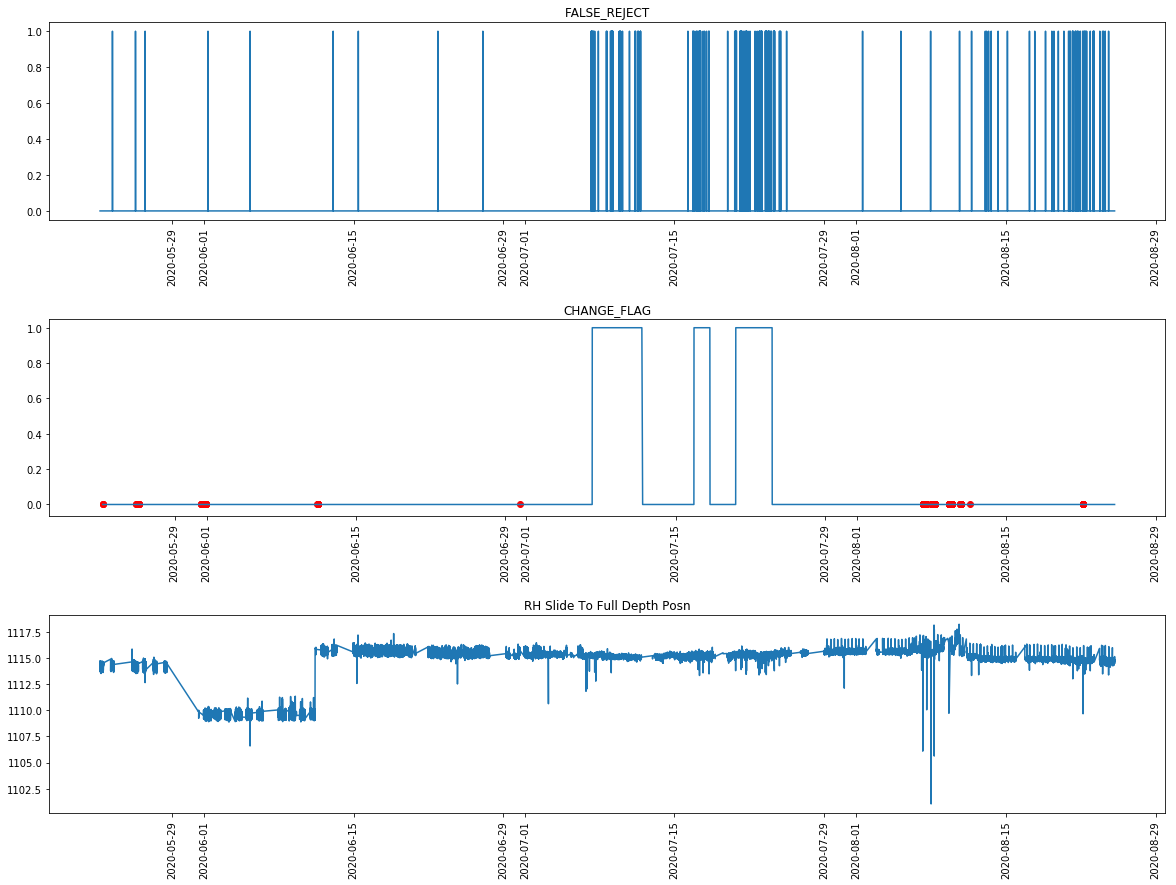

In [34]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_pd"]
features=['RH Slide To Full Depth Posn']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["PROD_TIMESTAMP"],df1["FALSE_REJECT"])
plt.title("FALSE_REJECT")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 'X', ['PROD_TIMESTAMP', 'ABNORMALITY_FLAG']] #anomaly
ax1.plot(df1["PROD_TIMESTAMP"],df1["ABNORMALITY_FLAG"])
ax1.scatter(a['PROD_TIMESTAMP'],a['ABNORMALITY_FLAG'], color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["PROD_TIMESTAMP"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

# Trying EWMA on FALSE REJECT Feature

In [43]:
import time
start= time.time()
feature = 'FALSE_REJECT'
data_stream = df[feature]

func = anomaly(method = 'ewma', params = {'mean':0,'variance':0,'lambda_value':0.005, 'p_value_warning':0.01,
                                'p_value_anomaly':0.00001,
                                'anomaly_text' : "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                                'warning_text' : "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by "})

feature_generator = feature_engineer(var_list = [],baseline_obs = 100, current_obs = 100, func='mean')


for i in range(len(data_stream)):
# for i in range(30):
    
  
    try:
        feature = feature_generator.generate_feature(data_stream[i])
        out = func.update(feature)
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = out
#         print(feature, func.obj.mean, func.obj.variance, func.obj.ewma_mean, func.obj.ewma_variance)

    except:
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = (0,'NA')

print("Time taken: " + str(time.time()-start))
    

Time taken: 137.8239004611969


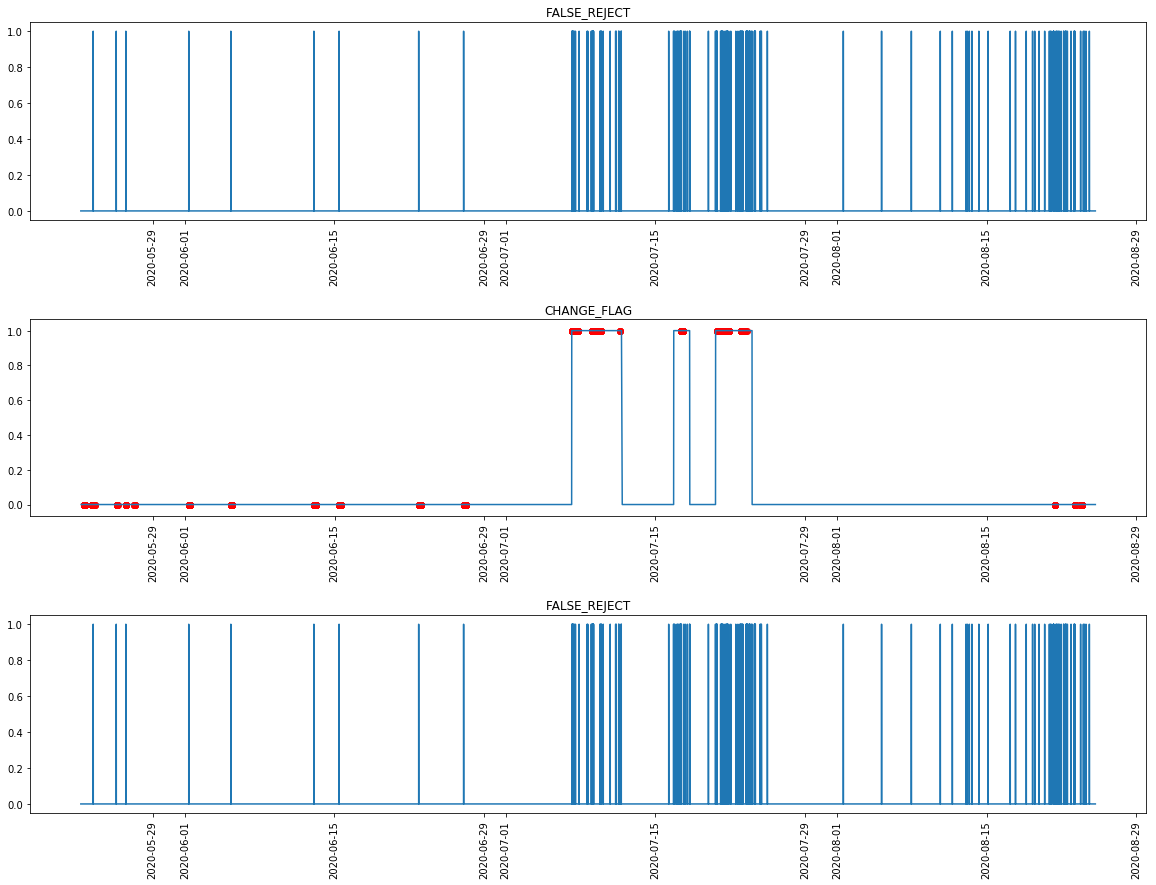

In [44]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_pd"]
features=['FALSE_REJECT']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["PROD_TIMESTAMP"],df1["FALSE_REJECT"])
plt.title("FALSE_REJECT")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 'X', ['PROD_TIMESTAMP', 'ABNORMALITY_FLAG']] #anomaly
ax1.plot(df1["PROD_TIMESTAMP"],df1["ABNORMALITY_FLAG"])
ax1.scatter(a['PROD_TIMESTAMP'],a['ABNORMALITY_FLAG'], color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["PROD_TIMESTAMP"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

# Trying ZSCORE on FALSE_REJECT Feature

In [45]:
import time
start= time.time()
feature = 'FALSE_REJECT'
data_stream = df[feature]

func = anomaly(method = 'zscore', params = {'mean':0,'variance':0,'n_elements':0, 'p_value_warning':0.01,
                                'p_value_anomaly':0.0001,
                                'anomaly_text' : "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                                'warning_text' : "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by "})

feature_generator = feature_engineer(var_list = [],baseline_obs = 100, current_obs = 100, func='mean')


for i in range(len(data_stream)):
  
    try:
        feature = feature_generator.generate_feature(data_stream[i])
        out = func.update(feature)
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = out

    except:
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = (0,'NA')

print("Time taken: " + str(time.time()-start))
    

Time taken: 312.4527370929718


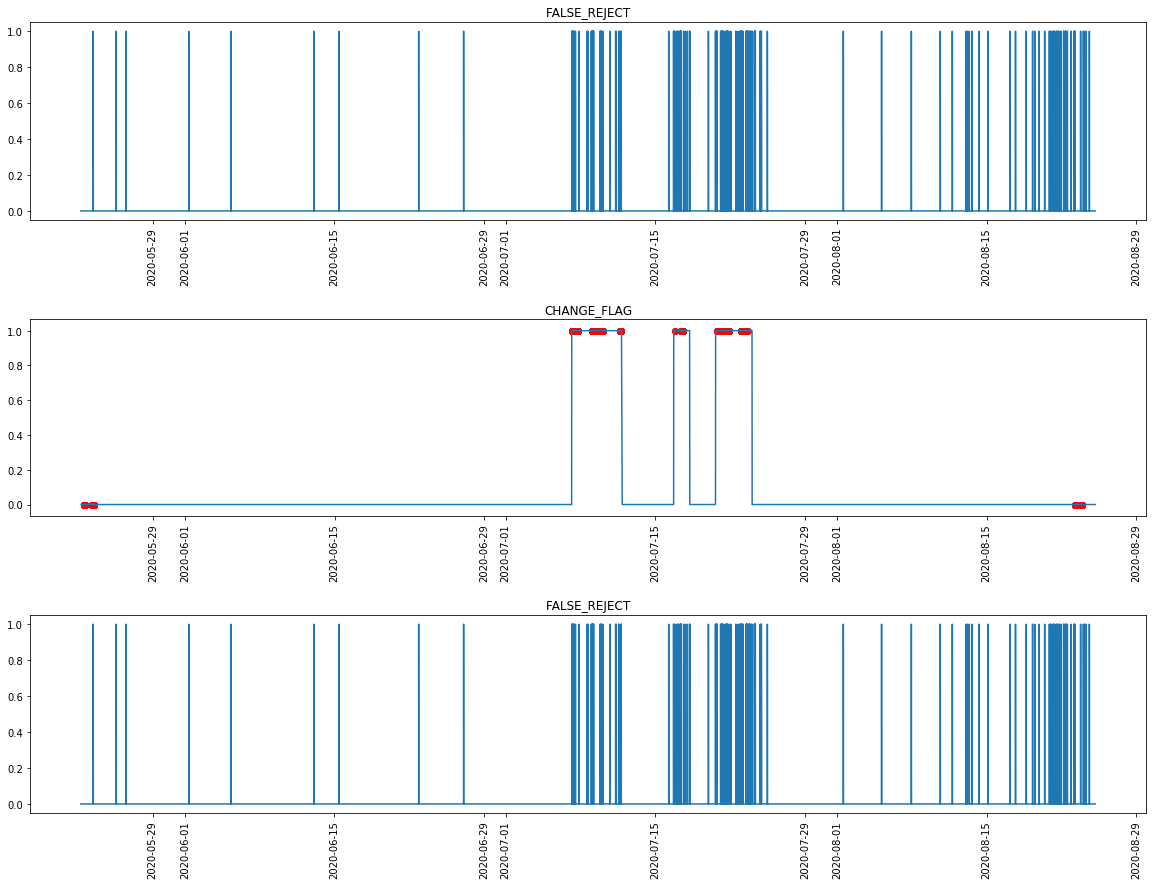

In [50]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_pd"]
features=['FALSE_REJECT']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["PROD_TIMESTAMP"],df1["FALSE_REJECT"])
plt.title("FALSE_REJECT")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 'X', ['PROD_TIMESTAMP', 'ABNORMALITY_FLAG']] #anomaly
ax1.plot(df1["PROD_TIMESTAMP"],df1["ABNORMALITY_FLAG"])
ax1.scatter(a['PROD_TIMESTAMP'],a['ABNORMALITY_FLAG'], color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["PROD_TIMESTAMP"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

# PTR Correlation 

In [65]:
df = pd.read_csv(os.getcwd()+"\\Data Files\\20200825_PTR.csv")

In [66]:
df["TimeStamp"] = pd.to_datetime(df["TimeStamp"],format = '%Y-%m-%d %H:%M:%S.%f')
df = df.sort_values(by = 'TimeStamp').reset_index()

In [67]:
df.head()

,index,collid,TimeStamp,PrimarySN,PartNumber,status,correlation_ptr,OP180PTR,OP170,OP170PTR,Reject_Code,PINION_TORQUE_TO_ROTATE_AUDIT_CYCLES
0,68,-1226755870,2020-08-09 00:00:10.817,01C202210772,40192263.0,A,0.158899,2.91389,2.75499,OP170B,0,1
1,69,-1226755844,2020-08-09 00:00:41.250,01A202210787,40192263.0,A,-0.052423,2.70486,2.75728,OP170A,0,1
2,70,-1226755441,2020-08-09 00:01:11.890,01C202210770,40192263.0,A,0.090352,2.93722,2.84687,OP170B,0,1
3,71,-1226755415,2020-08-09 00:01:53.103,01A202210359,40192263.0,A,0.021823,2.81824,2.79642,OP170A,0,1
4,72,-1226755396,2020-08-09 00:02:26.830,01A202210773,40192263.0,A,0.074130,2.73750,2.66337,OP170B,0,1


# Trying EWMA on PTR Correlation Feature

In [79]:
import time
start= time.time()
feature = 'correlation_ptr'
data_stream = df[feature]

func = anomaly(method = 'ewma', params = {'mean':0,'variance':0,'lambda_value':0.005, 'p_value_warning':0.01,
                                'p_value_anomaly':0.00001,
                                'anomaly_text' : "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                                'warning_text' : "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by "})

feature_generator = feature_engineer(var_list = [],baseline_obs = 10, current_obs = 10, func='mean')


for i in range(len(data_stream)):
# for i in range(30):
    
  
    try:
        feature = feature_generator.generate_feature(data_stream[i])
        out = func.update(feature)
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = out
#         print(feature, func.obj.mean, func.obj.variance, func.obj.ewma_mean, func.obj.ewma_variance)

    except:
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = (0,'NA')

print("Time taken: " + str(time.time()-start))
    

Time taken: 34.41413736343384


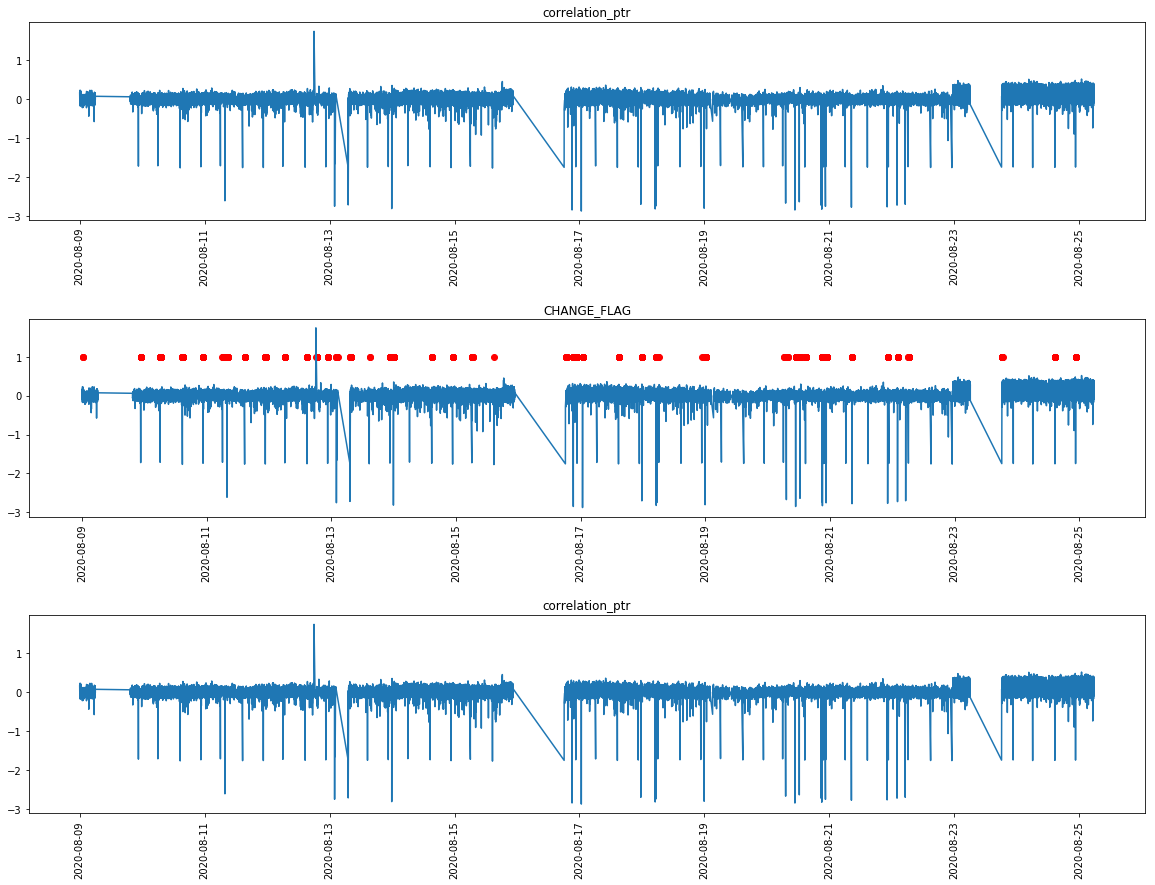

In [80]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_pd"]
features=['correlation_ptr']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["TimeStamp"],df1["correlation_ptr"])
plt.title("correlation_ptr")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 'X', ['TimeStamp', 'correlation_ptr']] #anomaly
ax1.plot(df1["TimeStamp"],df1["correlation_ptr"])
ax1.scatter(a['TimeStamp'],[1]*len(a["correlation_ptr"]), color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["TimeStamp"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

# Trying ZSCORE on PTR_CORRELATION Feature

In [82]:
import time
start= time.time()
feature = 'correlation_ptr'
data_stream = df[feature]

func = anomaly(method = 'zscore', params = {'mean':0,'variance':0,'n_elements':0, 'p_value_warning':0.01,
                                'p_value_anomaly':0.0001,
                                'anomaly_text' : "Shift: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by ", 
                                'warning_text' : "Warning: The feature(Mean of current 10 obs - mean of previous 10 obs) shifted by "})

feature_generator = feature_engineer(var_list = [],baseline_obs = 10, current_obs = 10, func='mean')


for i in range(len(data_stream)):
  
    try:
        feature = feature_generator.generate_feature(data_stream[i])
        out = func.update(feature)
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = out

    except:
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = (0,'NA')

print("Time taken: " + str(time.time()-start))
    

Time taken: 33.07283592224121


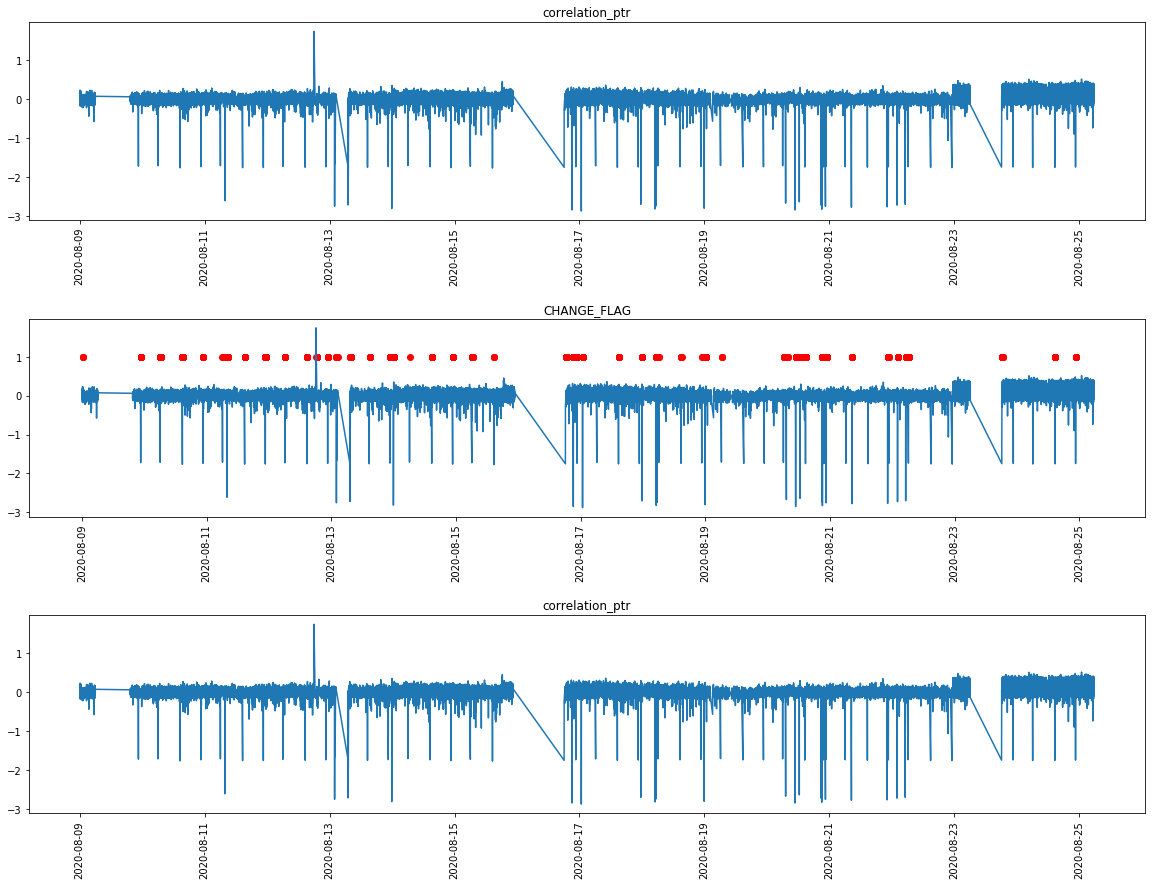

In [83]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_pd"]
features=['correlation_ptr']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["TimeStamp"],df1["correlation_ptr"])
plt.title("correlation_ptr")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 'X', ['TimeStamp', 'correlation_ptr']] #anomaly
ax1.plot(df1["TimeStamp"],df1["correlation_ptr"])
ax1.scatter(a['TimeStamp'],[1]*len(a["correlation_ptr"]), color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["TimeStamp"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

# Implement Threshold Function

In [105]:
import time
start= time.time()
feature = 'correlation_ptr'
data_stream = df[feature]

func = anomaly(method = 'threshold', params = {'mean' : 0, 'n_elements':0, 'threshold_type' : 'ABSOLUTE', 'upper_thresh_anamoly' : 1, 'lower_thresh_anamoly' : 1, 
                                    'upper_thresh_warning' : 0.5, 'lower_thresh_warning' : 0.5})

# feature_generator = feature_engineer(var_list = [],baseline_obs = 10, current_obs = 10, func='mean')


for i in range(len(data_stream)):
  
    try:
        feature = data_stream[i]
        out = func.update(feature)
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = out

    except:
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"]) = (0,'NA')

print("Time taken: " + str(time.time()-start))
    

Time taken: 33.459537506103516


C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


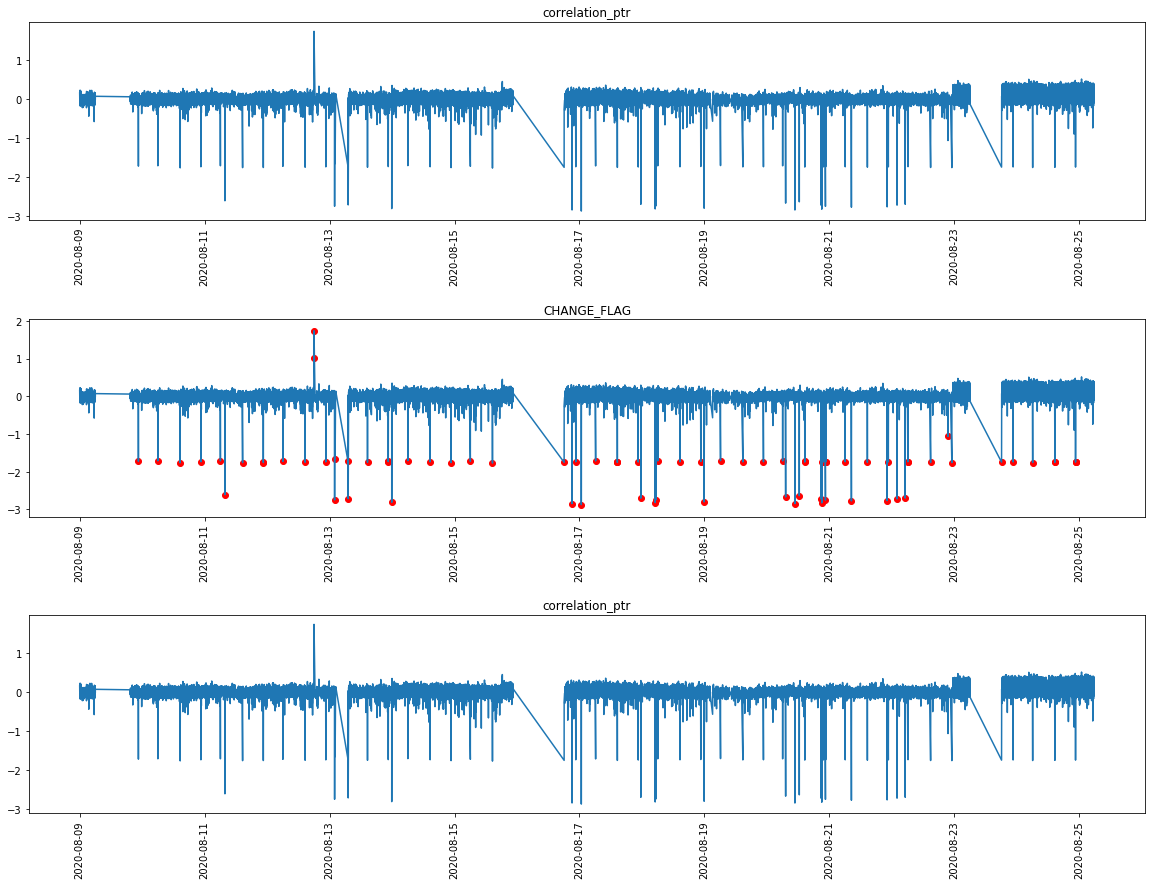

In [106]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_pd"]
features=['correlation_ptr']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["TimeStamp"],df1["correlation_ptr"])
plt.title("correlation_ptr")
plt.xticks(rotation = 90,)


# ax1= fig.add_subplot(n_graphs,1,2)
# a = df1.loc[df1['DRIFT'] == 'X', ['TimeStamp', 'correlation_ptr']] #anomaly
# ax1.plot(df1["TimeStamp"],df1["correlation_ptr"])
# ax1.scatter(a['TimeStamp'],[1]*len(a["correlation_ptr"]), color='red')
# plt.title("CHANGE_FLAG")
# plt.xticks(rotation = 90,)

ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 'X', ['TimeStamp', 'correlation_ptr']] #anomaly
ax1.plot(df1["TimeStamp"],df1["correlation_ptr"])
ax1.scatter(a['TimeStamp'],a["correlation_ptr"], color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)



for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["TimeStamp"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

In [107]:
df.anomaly_flag_mean_pd.value_counts()

0    29654
X       86
W       58
Name: anomaly_flag_mean_pd, dtype: int64

# Archieve Archieve Archieve Archieve Archieve Archieve Archieve Archieve

# Archieve(Older Structure of Classes)

In [9]:
class anomaly_detection:
    def __init__(self, mean = 0, variance = 0, n_elements = 0, var_list = [], feature = 0, threshold_feature_eng = 100,
                baseline_obs = 10, current_obs = 10, p_value_warning = 0.001, p_value_anomaly = 0.0001, func='mean', 
                method = 'Z_SCORE'):
        self.mean = mean
        self.variance = variance 
        self.n_elements = n_elements
        self.var_list = var_list[:]
        self.feature = feature
        self.threshold_feature_eng = threshold_feature_eng
        self.baseline_obs = baseline_obs 
        self.current_obs = current_obs
        self.p_value_warning = p_value_warning
        self.p_value_anomaly = p_value_anomaly
        self.func = func
        self.method = method
        
#Add cutoffs here 
    def update(self, element):
        if self.method == 'Z_SCORE':
            warning_flag = 0
            anomaly_flag = 0 
            warning_text = 'NA'
            anomaly_text = 'NA'
            if len(self.var_list) >= self.threshold_feature_eng:
                self.var_list.pop(0)
            self.var_list.append(element)
            if len(self.var_list) >= self.baseline_obs + self.current_obs:
                if self.func == 'std':
                    self.feature = np.std(self.var_list[-(self.current_obs):])-np.std(self.var_list[-(self.baseline_obs+self.current_obs):-(self.current_obs)])
                elif self.func == 'median':
                    self.feature = np.median(self.var_list[-(self.current_obs):])-np.median(self.var_list[-(self.baseline_obs+self.current_obs):-(self.current_obs)])
                else :
                    self.feature = np.mean(self.var_list[-(self.current_obs):])-np.mean(self.var_list[-(self.baseline_obs+self.current_obs):-(self.current_obs)])

                z_anomaly = st.norm.ppf(1-self.p_value_anomaly)
                anomaly_flag = int(np.where((self.feature >= self.mean+z_anomaly*np.sqrt(self.variance)) | 
                                            (self.feature <= self.mean-z_anomaly*np.sqrt(self.variance)),1,0))
                anomaly_text = str(np.where((self.feature >= self.mean+z_anomaly*np.sqrt(self.variance)) | 
                                            (self.feature <= self.mean-z_anomaly*np.sqrt(self.variance)),
                                            'SHIFT:' + self.func + ' of current ' + str(self.current_obs) + ' observations shifted by ' + str(round(self.feature,2)) + ' compared to previous ' + str(self.baseline_obs) + ' observations'
                                            ,'NA'))


                z_warning = st.norm.ppf(1-self.p_value_warning)
                warning_flag = int(np.where((self.feature >= self.mean+z_warning*np.sqrt(self.variance)) | 
                                            (self.feature <= self.mean-z_warning*np.sqrt(self.variance)),1,0))
                warning_text = str(np.where((self.feature >= self.mean+z_warning*np.sqrt(self.variance)) | 
                                            (self.feature <= self.mean-z_warning*np.sqrt(self.variance)),
                                            'WARNING' + self.func + ' of current ' + str(self.current_obs) + ' observations shifted by ' + str(round(self.feature,2)) + ' compared to previous ' + str(self.baseline_obs) + ' observations'
                                            ,'NA'))


                self.variance = ((self.variance + self.mean ** 2) * self.n_elements + self.feature ** 2) / (self.n_elements + 1)
                self.mean = ((self.mean * self.n_elements) + self.feature) / (self.n_elements + 1)
                self.variance = self.variance - self.mean ** 2
                self.n_elements += 1

             
            
             
            
#             return (element,self.var_list,self.feature,self.mean,self.variance,self.func,anomaly_flag, anomaly_text, warning_flag, warning_text)
            return (anomaly_flag, anomaly_text, warning_flag, warning_text)
        


#### P value is basically proportion of population from 1 end that needs to be flagged. Effectively we end up flagging 2*P for both tails

In [11]:
class combined_anomaly:
    def __init__(self, mean = 0, variance = 0, n_elements = 0, var_list = [], feature = 0, threshold_feature_eng = 100,
                baseline_obs = 10, current_obs = 10,  p_value_warning = 0.001, p_value_anomaly = 0.0001, method = 'Z_SCORE'):
        self.mean_obj = anomaly_detection(mean = mean, variance = variance, n_elements = n_elements, 
                                      var_list = var_list, feature = feature, threshold_feature_eng = threshold_feature_eng,
                baseline_obs = baseline_obs, current_obs = current_obs, p_value_warning = p_value_warning, p_value_anomaly=p_value_anomaly, func="mean", method = method)
        self.std_obj = anomaly_detection(mean = mean, variance = variance, n_elements = n_elements, 
                                      var_list = var_list, feature = feature, threshold_feature_eng = threshold_feature_eng,
                baseline_obs = baseline_obs, current_obs = current_obs, p_value_warning = p_value_warning, p_value_anomaly=p_value_anomaly, func="std", method = method)
        self.median_obj = anomaly_detection(mean = mean, variance = variance, n_elements = n_elements, 
                                      var_list = var_list, feature = feature, threshold_feature_eng = threshold_feature_eng,
                baseline_obs = baseline_obs, current_obs = current_obs, p_value_warning = p_value_warning, p_value_anomaly=p_value_anomaly, func="median", method = method)
        
        
    def update(self, element):
            return({'mean': self.mean_obj.update(element),
                    'median': self.median_obj.update(element),
                    'std': self.std_obj.update(element)})
            


## Pinion Slide To Full Depth Posn

In [13]:
import time
start= time.time()
feature = 'Pinion Slide To Full Depth Posn'
data_stream = df[feature]

func = combined_anomaly(baseline_obs = 10, current_obs = 10, p_value_warning=0.001,
    p_value_anomaly=0.0001)

for i in range(len(data_stream)):
#     try:
        out = func.update(data_stream[i])
        (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"], df.loc[df.index[i],"warning_flag_mean_pd"], df.loc[df.index[i],"warning_text_mean_pd"]) = out["mean"]
        (df.loc[df.index[i],"anomaly_flag_median_pd"], df.loc[df.index[i],"anomaly_text_median_pd"], df.loc[df.index[i],"warning_flag_median_pd"], df.loc[df.index[i],"warning_text_median_pd"]) = out["median"]
        (df.loc[df.index[i],"anomaly_flag_std_pd"], df.loc[df.index[i],"anomaly_text_std_pd"], df.loc[df.index[i],"warning_flag_std_pd"], df.loc[df.index[i],"warning_text_std_pd"]) = out["std"]
#     except:
#         (df.loc[df.index[i],"anomaly_flag_mean_pd"], df.loc[df.index[i],"anomaly_text_mean_pd"], df.loc[df.index[i],"warning_flag_mean_pd"], df.loc[df.index[i],"warning_text_mean_pd"]) = (0,'NA',0,'NA')
#         (df.loc[df.index[i],"anomaly_flag_median_pd"], df.loc[df.index[i],"anomaly_text_median_pd"], df.loc[df.index[i],"warning_flag_median_pd"], df.loc[df.index[i],"warning_text_median_pd"]) = (0,'NA',0,'NA')
#         (df.loc[df.index[i],"anomaly_flag_std_pd"], df.loc[df.index[i],"anomaly_text_std_pd"], df.loc[df.index[i],"warning_flag_std_pd"], df.loc[df.index[i],"warning_text_std_pd"]) = (0,'NA',0,'NA')
print("Time taken: " + str(time.time()-start))
    

Time taken: 863.244211435318


C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


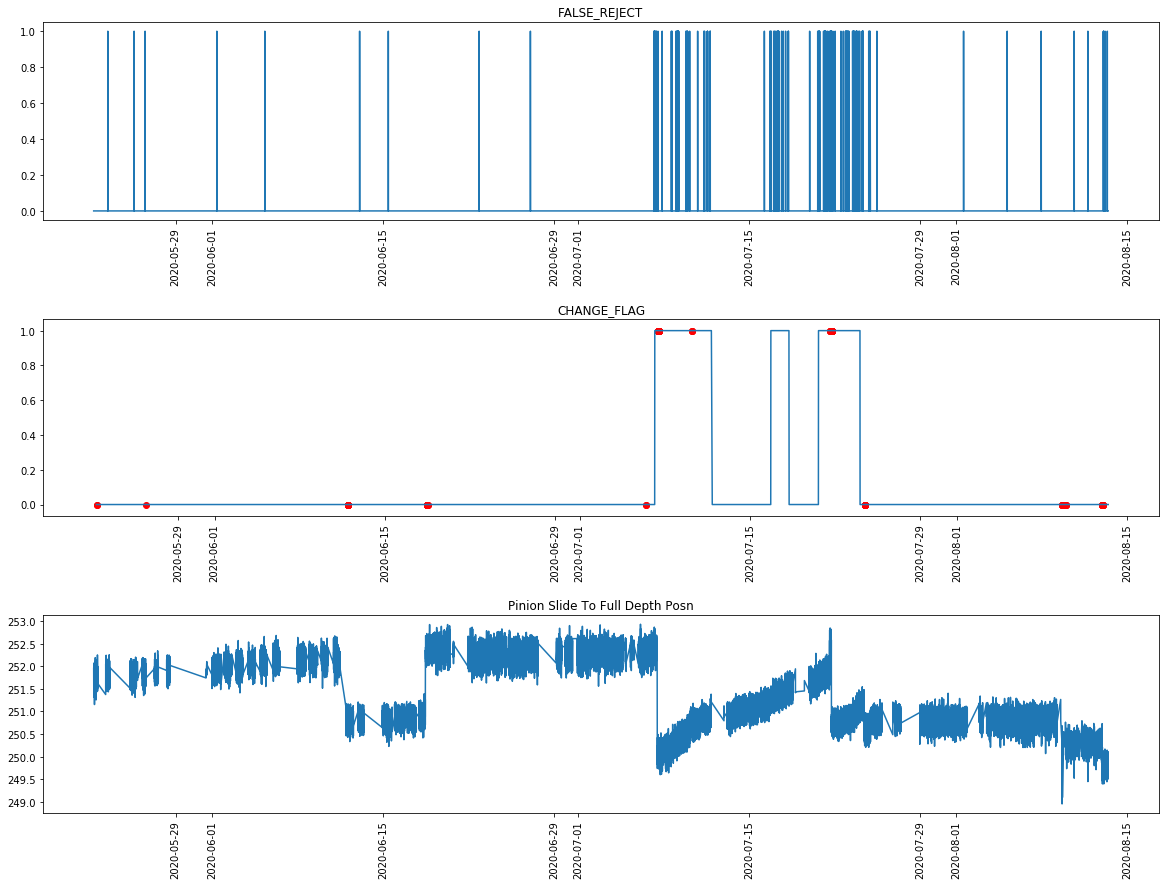

In [14]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_pd"]
features=['Pinion Slide To Full Depth Posn']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["PROD_TIMESTAMP"],df1["FALSE_REJECT"])
plt.title("FALSE_REJECT")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 1, ['PROD_TIMESTAMP', 'ABNORMALITY_FLAG']] #anomaly
ax1.plot(df1["PROD_TIMESTAMP"],df1["ABNORMALITY_FLAG"])
ax1.scatter(a['PROD_TIMESTAMP'],a['ABNORMALITY_FLAG'], color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["PROD_TIMESTAMP"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

## LH Slide To Full Depth Posn

In [15]:
import time
start= time.time()
feature = 'LH Slide To Full Depth Posn'
data_stream = df[feature]

func = combined_anomaly(baseline_obs = 10, current_obs = 10, p_value_warning=0.001,
    p_value_anomaly=0.0001)

for i in range(len(data_stream)):
    try:
        out = func.update(data_stream[i])
        (df.loc[df.index[i],"anomaly_flag_mean_lh"], df.loc[df.index[i],"anomaly_text_mean_lh"], df.loc[df.index[i],"warning_flag_mean_lh"], df.loc[df.index[i],"warning_text_mean_lh"]) = out["mean"]
        (df.loc[df.index[i],"anomaly_flag_median_lh"], df.loc[df.index[i],"anomaly_text_median_lh"], df.loc[df.index[i],"warning_flag_median_lh"], df.loc[df.index[i],"warning_text_median_lh"]) = out["median"]
        (df.loc[df.index[i],"anomaly_flag_std_lh"], df.loc[df.index[i],"anomaly_text_std_lh"], df.loc[df.index[i],"warning_flag_std_lh"], df.loc[df.index[i],"warning_text_std_lh"]) = out["std"]
    except:
        (df.loc[df.index[i],"anomaly_flag_mean_lh"], df.loc[df.index[i],"anomaly_text_mean_lh"], df.loc[df.index[i],"warning_flag_mean_lh"], df.loc[df.index[i],"warning_text_mean_lh"]) = (0,'NA',0,'NA')
        (df.loc[df.index[i],"anomaly_flag_median_lh"], df.loc[df.index[i],"anomaly_text_median_lh"], df.loc[df.index[i],"warning_flag_median_lh"], df.loc[df.index[i],"warning_text_median_lh"]) = (0,'NA',0,'NA')
        (df.loc[df.index[i],"anomaly_flag_std_lh"], df.loc[df.index[i],"anomaly_text_std_lh"], df.loc[df.index[i],"warning_flag_std_lh"], df.loc[df.index[i],"warning_text_std_lh"]) = (0,'NA',0,'NA')
        
print("Time taken: " + str(time.time()-start))
    

Time taken: 864.249757528305


C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


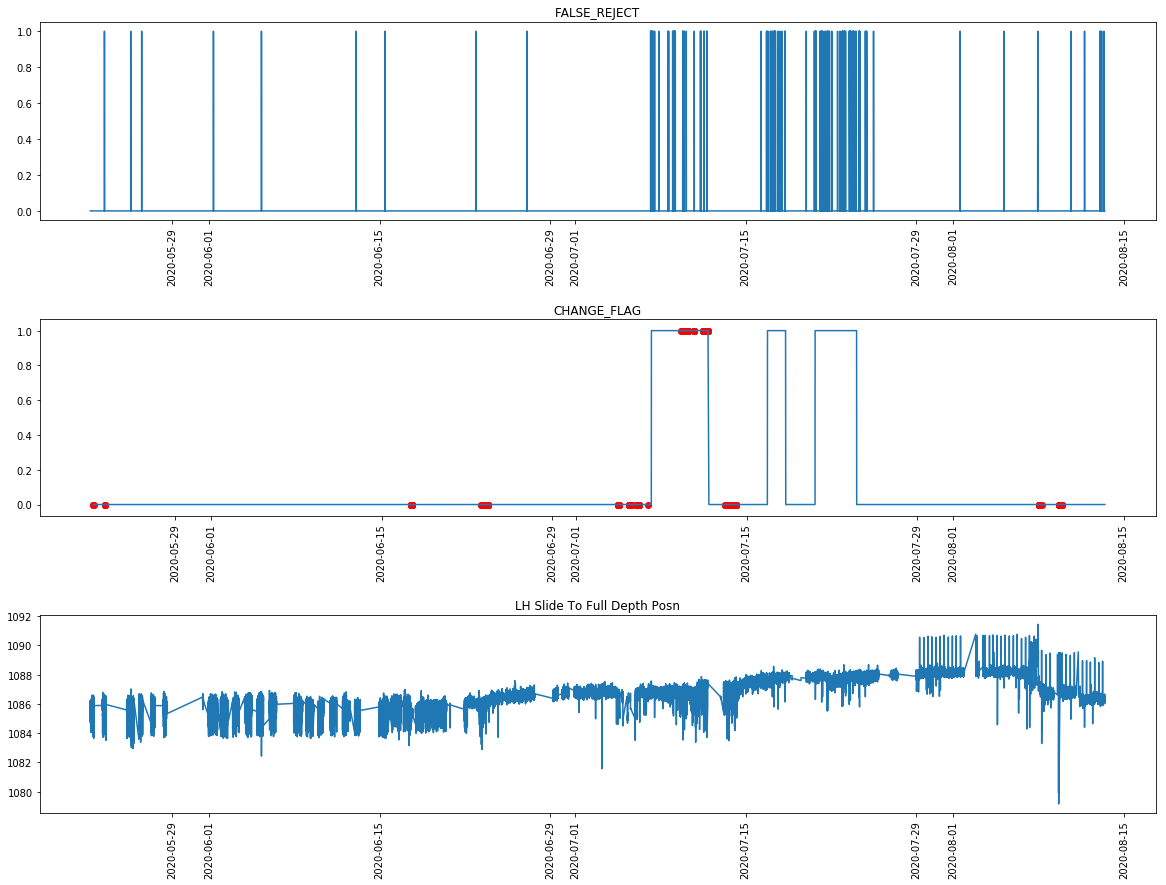

In [16]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_lh"]
features=['LH Slide To Full Depth Posn']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["PROD_TIMESTAMP"],df1["FALSE_REJECT"])
plt.title("FALSE_REJECT")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 1, ['PROD_TIMESTAMP', 'ABNORMALITY_FLAG']] #anomaly
ax1.plot(df1["PROD_TIMESTAMP"],df1["ABNORMALITY_FLAG"])
ax1.scatter(a['PROD_TIMESTAMP'],a['ABNORMALITY_FLAG'], color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["PROD_TIMESTAMP"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

## RH Slide To Full Depth Posn

In [17]:
import time
start= time.time()
feature = 'RH Slide To Full Depth Posn'
data_stream = df[feature]

func = combined_anomaly(baseline_obs = 10, current_obs = 10, p_value_warning=0.001,
    p_value_anomaly=0.0001)

for i in range(len(data_stream)):
    out = func.update(data_stream[i])
    (df.loc[df.index[i],"anomaly_flag_mean_rh"], df.loc[df.index[i],"anomaly_text_mean_rh"], df.loc[df.index[i],"warning_flag_mean_rh"], df.loc[df.index[i],"warning_text_mean_rh"]) = out["mean"]
    (df.loc[df.index[i],"anomaly_flag_median_rh"], df.loc[df.index[i],"anomaly_text_median_rh"], df.loc[df.index[i],"warning_flag_median_rh"], df.loc[df.index[i],"warning_text_median_rh"]) = out["median"]
    (df.loc[df.index[i],"anomaly_flag_std_rh"], df.loc[df.index[i],"anomaly_text_std_rh"], df.loc[df.index[i],"warning_flag_std_rh"], df.loc[df.index[i],"warning_text_std_rh"]) = out["std"]

print("Time taken: " + str(time.time()-start))
    

Time taken: 821.588217496872


C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


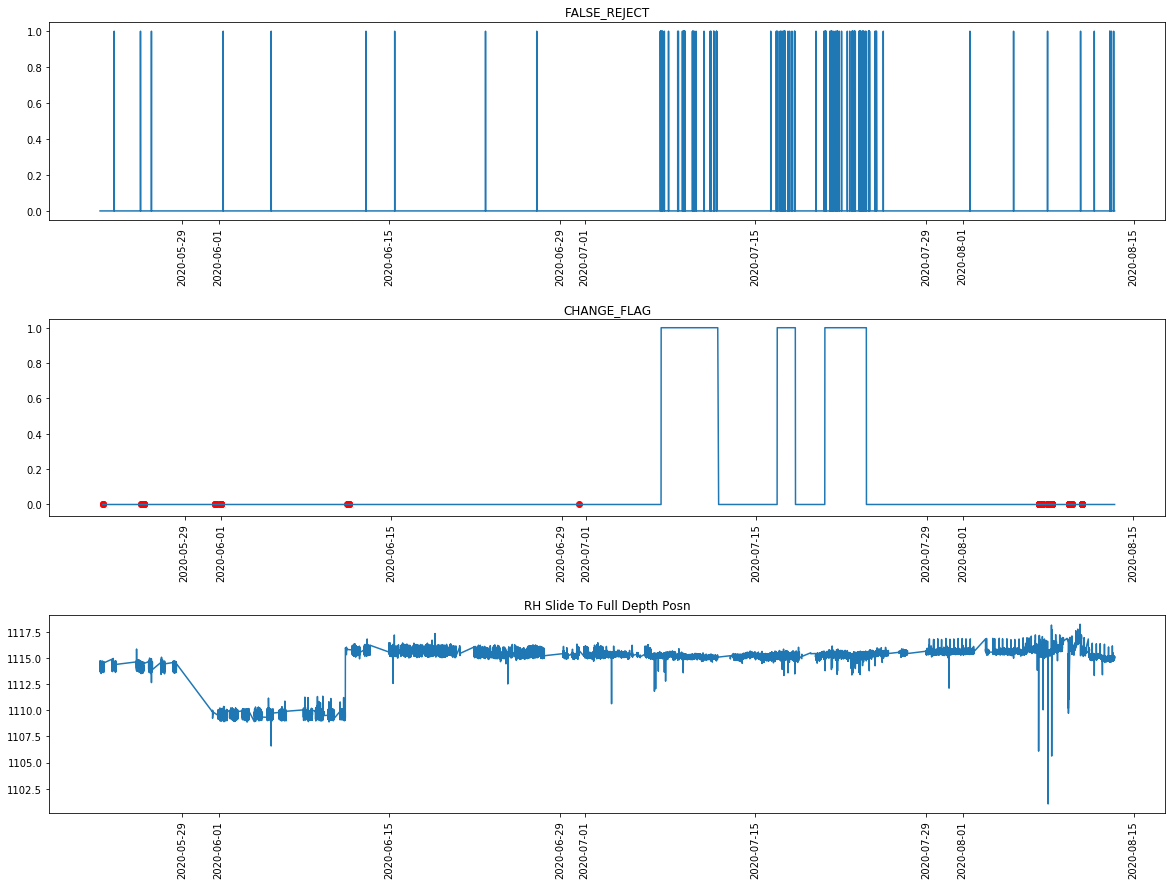

In [19]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean_rh"]
features=['RH Slide To Full Depth Posn']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["PROD_TIMESTAMP"],df1["FALSE_REJECT"])
plt.title("FALSE_REJECT")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 1, ['PROD_TIMESTAMP', 'ABNORMALITY_FLAG']] #anomaly
ax1.plot(df1["PROD_TIMESTAMP"],df1["ABNORMALITY_FLAG"])
ax1.scatter(a['PROD_TIMESTAMP'],a['ABNORMALITY_FLAG'], color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["PROD_TIMESTAMP"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

## Try with False reject (Maybe as an alternative to isolation forest)

In [312]:
import time
start= time.time()
feature = 'FALSE_REJECT'
data_stream = df[feature]

func_false_reject = combined_anomaly(baseline_obs = 100, current_obs = 100, p_value_warning=0.01,threshold_feature_eng=500,
    p_value_anomaly=0.00001)

for i in range(len(data_stream)):
    out = func_false_reject.update(data_stream[i])
    (df.loc[df.index[i],"anomaly_flag_mean_fr"], df.loc[df.index[i],"anomaly_text_mean_fr"], df.loc[df.index[i],"warning_flag_mean_fr"], df.loc[df.index[i],"warning_text_mean_fr"]) = out["mean"]
    (df.loc[df.index[i],"anomaly_flag_median_fr"], df.loc[df.index[i],"anomaly_text_median_fr"], df.loc[df.index[i],"warning_flag_median_fr"], df.loc[df.index[i],"warning_text_median_fr"]) = out["median"]
    (df.loc[df.index[i],"anomaly_flag_std_fr"], df.loc[df.index[i],"anomaly_text_std_fr"], df.loc[df.index[i],"warning_flag_std_fr"], df.loc[df.index[i],"warning_text_std_fr"]) = out["std"]

print("Time taken: " + str(time.time()-start))
    

Time taken: 765.3039631843567


C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\aman.khatri91425\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


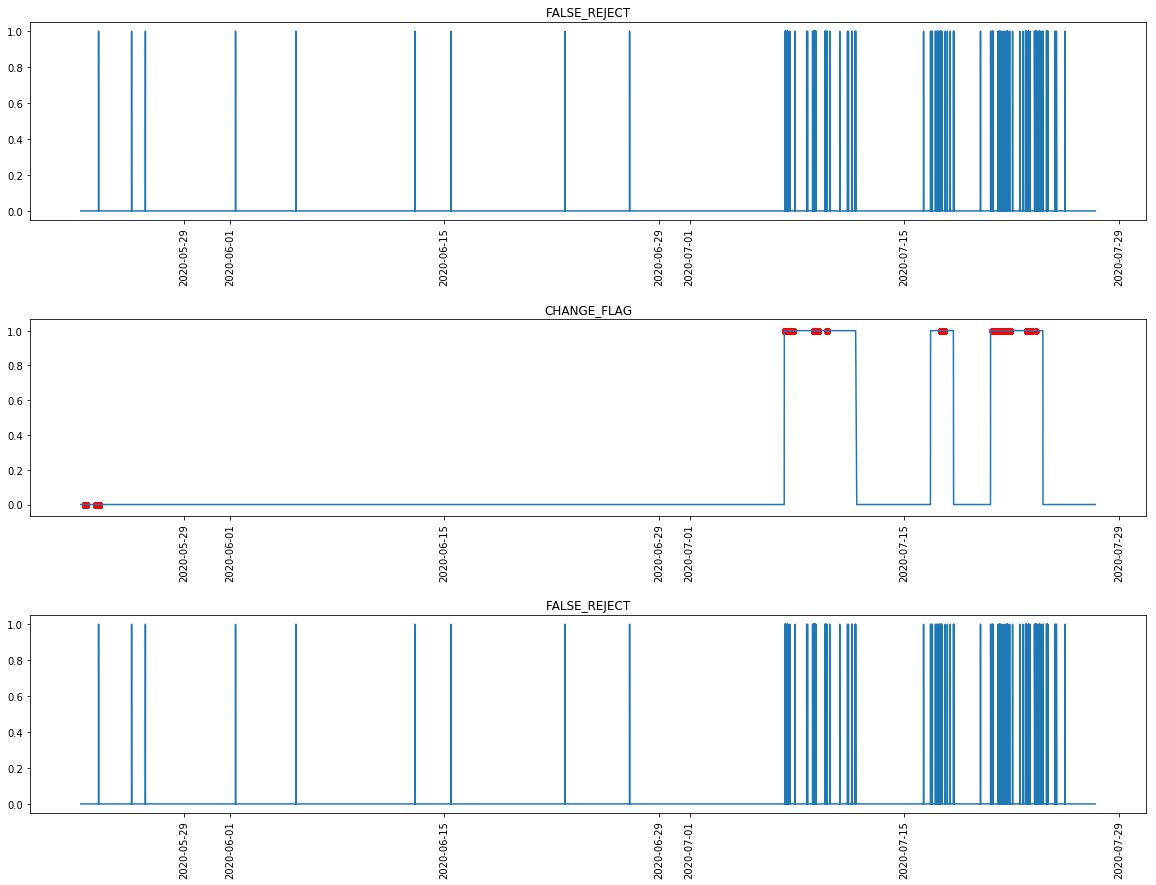

In [313]:
import matplotlib.pyplot as plt
df1=df
df1["DRIFT"]= df1["anomaly_flag_mean"]
features=['FALSE_REJECT']

n_graphs = len(features)+3
fig = plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.5)

ax1= fig.add_subplot(n_graphs,1,1)
ax1.plot(df1["PROD_TIMESTAMP"],df1["FALSE_REJECT"])
plt.title("FALSE_REJECT")
plt.xticks(rotation = 90,)


ax1= fig.add_subplot(n_graphs,1,2)
a = df1.loc[df1['DRIFT'] == 1, ['PROD_TIMESTAMP', 'ABNORMALITY_FLAG']] #anomaly
ax1.plot(df1["PROD_TIMESTAMP"],df1["ABNORMALITY_FLAG"])
ax1.scatter(a['PROD_TIMESTAMP'],a['ABNORMALITY_FLAG'], color='red')
plt.title("CHANGE_FLAG")
plt.xticks(rotation = 90,)


for x in range(len(features)):
    ax1= fig.add_subplot(n_graphs,1,x+3)
    ax1.plot(df1["PROD_TIMESTAMP"],df1[features[x]])
    plt.title(features[x])
    plt.xticks(rotation = 90,)

## Plot it on Power BI for better analysis